Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

* Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

* Did people become happier from 2012 to 2014? Compute results for each country in the sample.

* Who reported watching more TV in 2012, men or women?

* Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

* Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

* Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
from scipy.stats import kruskal, wilcoxon

In [2]:
survey = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
survey.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
survey.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [5]:
survey_clean = survey.dropna()
survey_clean.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
survey_clean.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

Time to answer some questions.

### 1.  Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [7]:
survey_data_2012 = survey_clean[survey_clean['year'] == 6]
survey_data_2014 = survey_clean[survey_clean['year'] == 7]

In [8]:
#ks test
from scipy.stats import kstest
print(kstest(survey_data_2012['ppltrst'], 'norm'))
print(kstest(survey_data_2014['ppltrst'], 'norm'))

KstestResult(statistic=0.9264024104247022, pvalue=0.0)
KstestResult(statistic=0.9289181703089356, pvalue=0.0)


Text(0.07, 0.5, 'Trust Level')

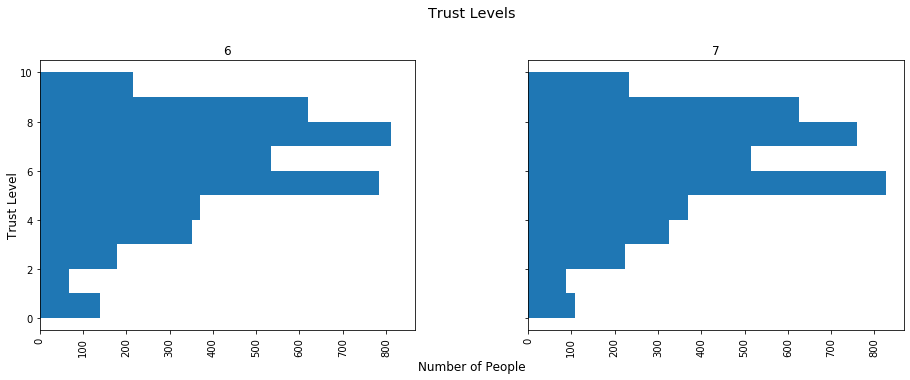

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

survey_clean.hist(by='year', column='ppltrst', ax=axes, orientation='horizontal')

plt.suptitle('Trust Levels', x=0.5, y=1.05, ha='center', fontsize='x-large')
fig.text(0.5, 0.04, 'Number of People', ha='center', fontsize='large')
fig.text(0.07, 0.5, 'Trust Level', va='center', rotation='vertical', fontsize='large')

In [10]:
#Use the Mann Whitney Test
stats.mannwhitneyu(survey_data_2012['ppltrst'],survey_data_2014['ppltrst'])

MannwhitneyuResult(statistic=8260446.0, pvalue=0.364910173807647)

In [11]:
for each in np.unique(survey_clean['cntry']):
    print(each)
    print(stats.mannwhitneyu(survey_data_2012[survey_data_2012['cntry']==each]['ppltrst'],
                          survey_data_2014[survey_data_2014['cntry']==each]['ppltrst']))

CH
MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)
CZ
MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)
DE
MannwhitneyuResult(statistic=84.0, pvalue=0.3741417871944901)
ES
MannwhitneyuResult(statistic=617480.0, pvalue=0.006194821052719307)
NO
MannwhitneyuResult(statistic=248611.0, pvalue=0.3246607781543741)
SE
MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


The distribution is non-normal which is why I used a non-parametric test.  In this situation, I used the Mann Whitney U test.  This test is a non-parametric test of the null hypothesis that is equally likely that a randomly selected value form one population will be less than or greater than a randomly selected value from a second population.  This is a test that we can use to investigate whether 2 independend samples were seleted from populations having the same distribution.

### 2.  Did people become happier from 2012 to 2014? Compute results for each country in the sample?

Let's first look at the differences of happiness between 2012 and 2014 to determine if we need a parametric test or a non-parametric test.

In [12]:
survey_2012_happy = survey_clean[survey_clean.year == 6]["happy"]
survey_2014_happy = survey_clean[survey_clean.year == 7]["happy"]

7.731515598133137
8.0


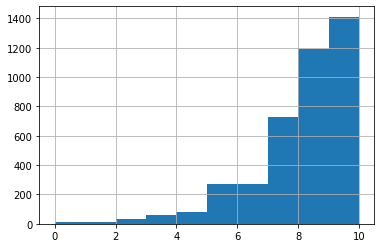

In [13]:
survey_2012_happy.hist()
print(survey_2012_happy.mean())
print(survey_2012_happy.median())

7.6854759568204125
8.0


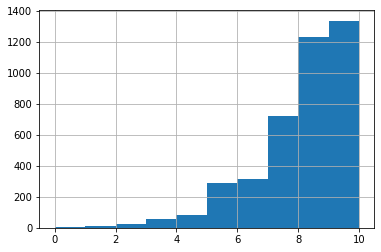

In [14]:
survey_2014_happy.hist()
print(survey_2014_happy.mean())
print(survey_2014_happy.median())

The data seems to show that it is non-parametric.  Let's try using the Kruskall Wallis Test.

In [15]:
print(kstest(survey_data_2012['happy'], 'norm'))
print(kstest(survey_data_2014['happy'], 'norm'))
stats.kruskal(survey_data_2012['happy'],survey_data_2014['happy'])

KstestResult(statistic=0.9846486281290184, pvalue=0.0)
KstestResult(statistic=0.9885912207122365, pvalue=0.0)


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Using this test, we see that there was no significant change in happiness between the years of 2012 and 2014.

### 3.  Who reported watching more TV in 2012, men or women?

In [16]:
survey_clean['gndr'].value_counts()

1.0    4103
2.0    4044
Name: gndr, dtype: int64

In [18]:
print('Males (1.0):', shapiro(survey_data_2012[survey_data_2012.gndr ==1].tvtot))
print('Females (2.0):', shapiro(survey_data_2012[survey_data_2012.gndr ==2].tvtot))

Males (1.0): (0.9443334937095642, 3.718612884828085e-27)
Females (2.0): (0.9407297372817993, 1.0867231118970029e-27)


In [19]:
print('Wilcoxon Test:', wilcoxon(survey_data_2012[survey_data_2012.gndr == 1].tvtot.dropna()[:2018], 
                                 y=survey_data_2012[survey_data_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=713031.0, pvalue=0.5367584843203085)


The Wilcoxon Test shows us that there is no significant difference between tv watch time between men and women.

### 4.  Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [21]:
partner = survey_clean['pplfair'][(survey_clean['partner'] == 1.0) & (survey_clean['year'] == 6)]
single = survey_clean['pplfair'][(survey_clean['partner'] == 2.0) & (survey_clean['year'] == 6)]

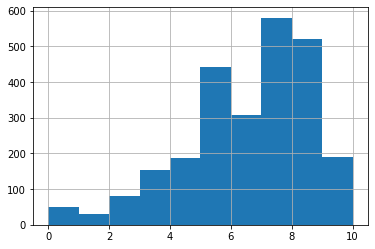

In [22]:
partner.hist()

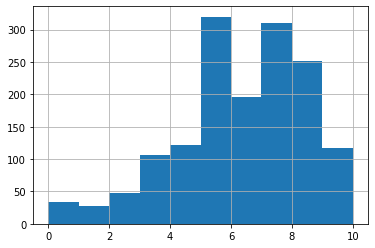

In [23]:
single.hist()

In [25]:
partner.median()

7.0

In [26]:
single.median()

6.0

In [27]:
len(partner)

2542

In [28]:
len(single)

1529

In [29]:
statistic, p_value = stats.mannwhitneyu(partner, single)

In [30]:
statistic

1819821.5

In [31]:
p_value

0.00028258143613772957

In [32]:
print('Fairness perceived by partner: ' + str(partner.mean()))
print('Fairness perceived by single: ' + str(single.mean()))  
print(stats.ttest_ind(partner, single))

Fairness perceived by partner: 6.0743509047993705
Fairness perceived by single: 5.86592544146501
Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


Looking at both the Mann Whitney U test and t-test, those who were partnered perceived that others were judged more fairly.

### 5.  Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [34]:
country_data= survey_clean['cntry'].unique().tolist()

In [39]:
social_meet_2014 = country_data[2:5]
social_meet_2014

['DE', 'ES', 'NO']

We will look at the data as it pertains to the following countries:
* Denmark
* Spain
* Norway

In [40]:
Denmark = survey_data_2014['sclmeet'][(survey_data_2014['cntry']=='DE')]
Spain = survey_data_2014['sclmeet'][(survey_data_2014['cntry']=='ES')]
Norway = survey_data_2014['sclmeet'][(survey_data_2014['cntry']=='NO')]

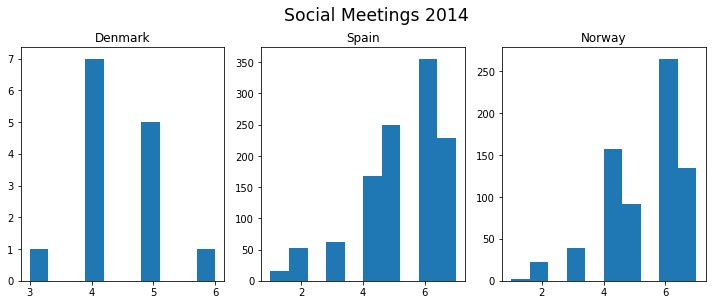

In [41]:
fig, ax1 = plt.subplots(1, 3, figsize=(10, 4))

ax1[0].hist(Denmark)
ax1[1].hist(Spain)
ax1[2].hist(Norway)

fig.text(0.4, 1, 'Social Meetings 2014', fontsize='xx-large')
ax1[0].set_title('Denmark')
ax1[1].set_title('Spain')
ax1[2].set_title('Norway')
    
plt.tight_layout()
plt.show()

In [46]:
F, p = stats.f_oneway(Denmark, Spain, Norway)

print('F score: ' + str(F))
print('P-value: ' + str(p))
print('Denmark Social Meetups mean: ' + str(Denmark.mean()))
print('Spain Social Meetups mean: ' + str(Spain.mean()))
print('Norway Social Meetups mean: ' + str(Norway.mean()))

F score: 2.8278064817149695
P-value: 0.059397147741555786
Denmark Social Meetups mean: 4.428571428571429
Spain Social Meetups mean: 5.263668430335097
Norway Social Meetups mean: 5.310393258426966


In [47]:
print('Denmark and Spain ' + str(stats.ttest_ind(Denmark, Spain)))
print('Denmark and Norway: ' + str(stats.ttest_ind(Denmark, Norway)))
print('Spain and Norway: ' + str(stats.ttest_ind(Spain, Norway)))

Denmark and Spain Ttest_indResult(statistic=-2.168865565712128, pvalue=0.030298013218196748)
Denmark and Norway: Ttest_indResult(statistic=-2.4461487954484564, pvalue=0.014676088277028506)
Spain and Norway: Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)


We used the ANOVA one-way test to see if there are statistical significant differences among the 3 countries.   Using the T-tests we see that the Denmark and Norway, and the Spain and Norway groupings show significant differences.

### 6.  Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [51]:
social_activity_2014 = country_data[3:6]
social_activity_2014

['ES', 'NO', 'SE']

We will look at the data as it pertains to the following countries:
* Spain
* Norway
* Sweden

In [52]:
Spain = survey_data_2014['sclmeet'][(survey_data_2014['cntry']=='ES')]
Norway = survey_data_2014['sclmeet'][(survey_data_2014['cntry']=='NO')]
Sweden = survey_data_2014['sclmeet'][(survey_data_2014['cntry']=='SE')]

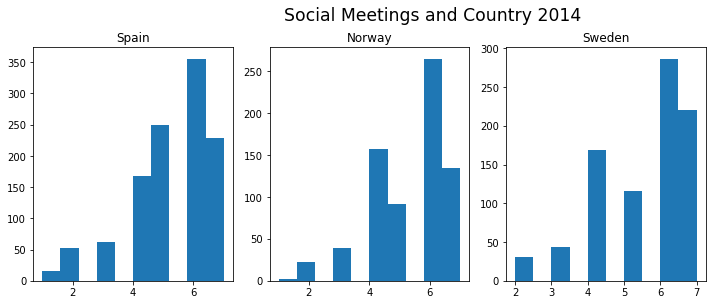

In [53]:
fig, ax1 = plt.subplots(1, 3, figsize=(10, 4))

ax1[0].hist(Spain)
ax1[1].hist(Norway)
ax1[2].hist(Sweden)

fig.text(0.4, 1, 'Social Meetings and Country 2014', fontsize='xx-large')
ax1[0].set_title('Spain')
ax1[1].set_title('Norway')
ax1[2].set_title('Sweden')
    
plt.tight_layout()
plt.show()

In [54]:
F, p = stats.f_oneway(Spain, Norway, Sweden)

print('F score: ' + str(F))
print('P-value: ' + str(p))
print('Spain Social Activities mean: ' + str(Spain.mean()))
print('Norway Social Activities mean: ' + str(Norway.mean()))
print('Sweden Social Activities mean: ' + str(Sweden.mean()))

F score: 3.8146762114057697
P-value: 0.02216331981881286
Spain Social Activities mean: 5.263668430335097
Norway Social Activities mean: 5.310393258426966
Sweden Social Activities mean: 5.434832756632065


In [55]:
print('Spain and Norway ' + str(stats.ttest_ind(Spain, Norway)))
print('Spain and Sweden: ' + str(stats.ttest_ind(Spain, Sweden)))
print('Norway and Sweden: ' + str(stats.ttest_ind(Norway, Sweden)))

Spain and Norway Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)
Spain and Sweden: Ttest_indResult(statistic=-2.6925202988475645, pvalue=0.0071506085242787525)
Norway and Sweden: Ttest_indResult(statistic=-1.8108243825311887, pvalue=0.07035826286442122)


For this problem, we used the ANOVA one-way test again.  Using this test, the t-test shows that the only significant difference is between Spain and Norway in regards to social activities.